Name: Namith Ravindranath.
Student ID: 23040851.
Topic: SVM_NonLinear_Classification.
Module: Machine Learning and Neural Networks.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [75]:
# Load the dataset
df = pd.read_csv("spiral.csv")

# Print rows
print(df.head(10))

# Check column names
print("Column Names:", df.columns)

   Unnamed: 0        X1        X2  y
0           0  0.118647 -0.181079  0
1           1  0.022316 -0.088976  0
2           2  0.181717  0.072110  0
3           3  0.256028 -0.042128  0
4           4  0.250036  0.012372  0
5           5  0.174588 -0.387222  0
6           6  0.163699  0.054883  0
7           7  0.127216  0.066992  0
8           8  0.222024 -0.166284  0
9           9  0.047914 -0.172113  0
Column Names: Index(['Unnamed: 0', 'X1', 'X2', 'y'], dtype='object')


In [76]:
# Droping the unnamed index column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Extracting features and target
X = df[['X1', 'X2']].values
y = df['y'].values

# Spliting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features (SVM performs better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

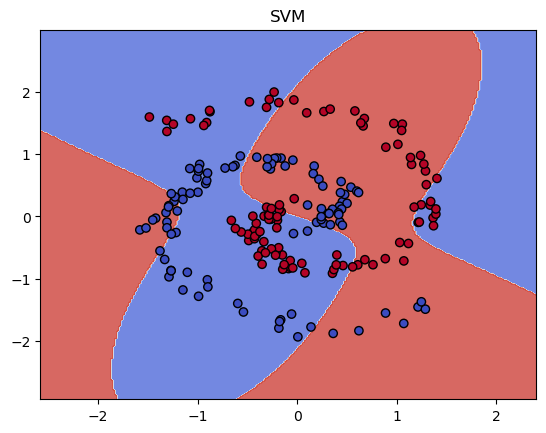

In [92]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # Step size in meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap="coolwarm")
    plt.title(title)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X_test, y_test, "SVM")

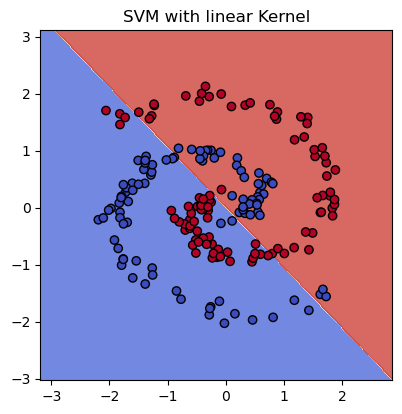

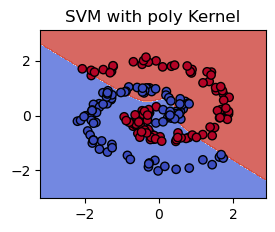

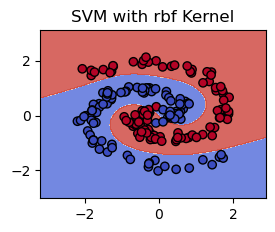

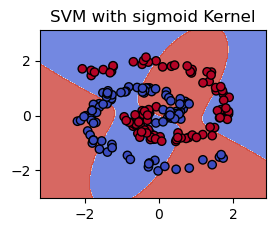

In [78]:
#COMPARISON OF DIFFERENT KERNELS

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}
accuracies = {}

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc
    models[kernel] = model

# Plot decision boundaries for each kernel
plt.figure(figsize=(10, 10))
for i, (kernel, model) in enumerate(models.items()):
    plt.subplot(2, 2, i+1)
    plot_decision_boundary(model, X_test_scaled, y_test, f"SVM with {kernel} Kernel")

In [79]:
# Evaluate accuracy for each kernel
accuracies = {}
for kernel, model in models.items():
    y_pred = model.predict(X_test)
    accuracies[kernel] = accuracy_score(y_test, y_pred)
    print(f"{kernel.capitalize()} Kernel Accuracy: {accuracies[kernel]:.4f}")

Linear Kernel Accuracy: 0.5250
Poly Kernel Accuracy: 0.5900
Rbf Kernel Accuracy: 0.9500
Sigmoid Kernel Accuracy: 0.3500


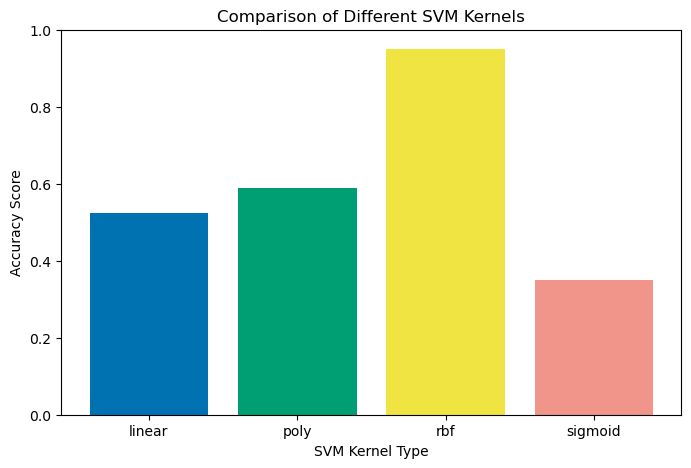

In [80]:
#BAR CHART COMPARING ACCURACIES 

plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['#0072B2', '#009E73', '#F0E442', '#f1948a'])
plt.xlabel("SVM Kernel Type")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Different SVM Kernels")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

In [81]:
#HYPERPARAMETER TUNING FOR RBF SVM

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters for RBF SVM:", grid_search.best_params_)

# Train optimized SVM model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters for RBF SVM: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Optimized SVM Accuracy: 1.0
